In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
def read_games(file):
    games = None
    with open(file, "r") as f:
        games = f.read().split("\n\n")

    games = [game for game in games if game != ""]

    formatted_games = []
    for game in games:
        data = game.split("\n")
        players = data[1].split(": ")[1].split(", ")
        results = data[2].split(": ")[1]
        results = [0.5, 0.5] if (results == "*" or results =="1/2-1/2") else [int(x) for x in results.split("-")]
        ratings = data[3].split(": ")[1].split(", ")
        ratings = [int(x) for x in ratings]
        moves = data[4].split(": ")[1].split(", ")
        durations = data[5].split(": ")[1].split(", ")
        durations = [float(x) for x in durations]

        formatted_games.append({
            "white": players[0],
            "black": players[1],
            "white_result": results[0],
            "black_result": results[1],
            "ratings": ratings,
            "white_rating": ratings[0],
            "black_rating": ratings[1],
            "moves": moves,
            "white_moves": moves[::2],
            "black_moves": moves[1::2],
            "durations": durations,
            "white_durations": durations[::2],
            "black_durations": durations[1::2],
        })

    return formatted_games

def split_games(games):
    new_games = []
    for game in games:
        new_games.append({
            "player": game["white"],
            "result": game["white_result"],
            "ratings": game["white_rating"],
            "moves": game["white_moves"],
            "durations": game["white_durations"],
        })
        new_games.append({
            "player": game["black"],
            "result": game["black_result"],
            "ratings": game["black_rating"],
            "moves": game["black_moves"],
            "durations": game["black_durations"],
        })
    return new_games

## Minimax 1 tournament

              avg_duration  max_duration  min_duration
player                                                
minimax_1_d4      0.525307          2.08          0.26
minimax_1_d3      0.103975          0.89          0.01
minimax_1_d2      0.010384          0.08          0.00
minimax_1_d1      0.000000          0.00          0.00


C:\Users\salla\AppData\Local\Temp\ipykernel_26828\3256959457.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


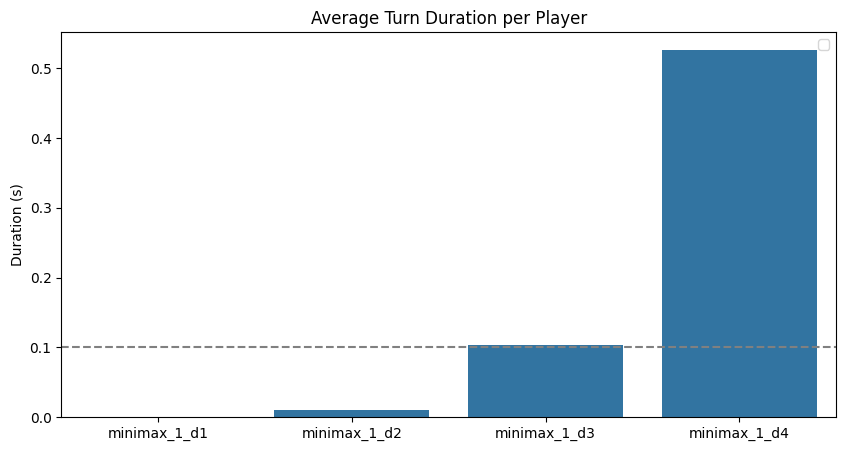

In [15]:
games = read_games("./tournaments/tournament_2.txt")
df_split_games = pd.DataFrame(split_games(games))
df_split_games["num_moves"] = df_split_games["moves"].apply(lambda x: len(x))
df_split_games["avg_duration"] = df_split_games["durations"].apply(lambda x: np.mean(x))
df_split_games["max_duration"] = df_split_games["durations"].apply(lambda x: max(x))
df_split_games["min_duration"] = df_split_games["durations"].apply(lambda x: min(x))
df_split_games.sort_values(by="max_duration", ascending=False)

durations = df_split_games.groupby("player").agg({"avg_duration": "mean", "max_duration": "max", "min_duration": "min"}).sort_values(by="avg_duration", ascending=False)
print(durations)
# Plot for avg_duration
plt.figure(figsize=(10, 5))
sns.barplot(data=durations, x=durations.index, y="avg_duration", order=durations.sort_values(by="avg_duration", ascending=True).index, errorbar=None)
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.legend()
plt.title("Average Turn Duration per Player")
plt.ylabel("Duration (s)")
plt.xlabel("")
plt.show()

In [ ]:
#           Player       Rating  Number of Games  Number of Win  Number of Draw  Number of Lose  Win Rate
# 0  minimax_1_d3  1274.591424               43              9              34               0  0.209302
# 1  minimax_1_d4  1206.577791               45              0              45               0  0.000000
# 2  minimax_1_d2  1202.680315               34              0              34               0  0.000000
# 3  minimax_1_d1  1127.662577               38              0              29               9  0.000000

In [204]:
df_split_games.groupby(["player", "result"]).size().unstack().fillna(0).sort_values(1, ascending=False)

result,0.0,0.5,1.0
player,,,
minimax_1_d3,0.0,34.0,9.0
minimax_1_d1,9.0,29.0,0.0
minimax_1_d2,0.0,34.0,0.0
minimax_1_d4,0.0,45.0,0.0


# Minimax 3 tournament

              avg_duration  max_duration  min_duration
player                                                
minimax_3_d3      2.364482         18.51          0.04
minimax_3_d2      0.230476          0.96          0.01
minimax_3_d1      0.010525          0.13          0.00


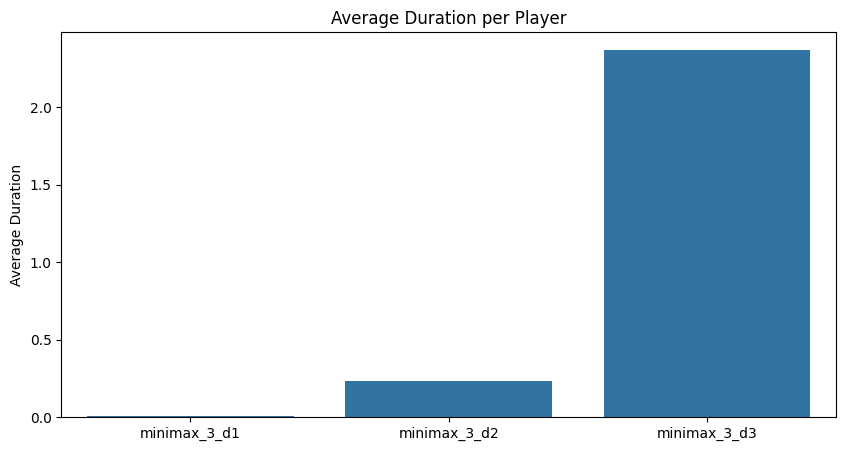

In [258]:
games = read_games("./tournaments/tournament_3.txt")
df_split_games = pd.DataFrame(split_games(games))
df_split_games["num_moves"] = df_split_games["moves"].apply(lambda x: len(x))
df_split_games["avg_duration"] = df_split_games["durations"].apply(lambda x: np.mean(x))
df_split_games["max_duration"] = df_split_games["durations"].apply(lambda x: max(x))
df_split_games["min_duration"] = df_split_games["durations"].apply(lambda x: min(x))
df_split_games.sort_values(by="max_duration", ascending=False)

durations = df_split_games.groupby("player").agg({"avg_duration": "mean", "max_duration": "max", "min_duration": "min"}).sort_values(by="avg_duration", ascending=False)
print(durations)
# Plot for avg_duration
plt.figure(figsize=(10, 5))
sns.barplot(data=durations, x=durations.index, y="avg_duration", order=durations.sort_values(by="avg_duration", ascending=True).index, errorbar=None)
plt.title("Average Duration per Player")
plt.ylabel("Average Duration")
plt.xlabel("")
plt.show()

# # Plot for max_duration
# plt.figure(figsize=(10, 5))
# sns.barplot(data=durations, x=durations.index, y="max_duration", order=durations.sort_values(by="max_duration", ascending=True).index, errorbar=None)
# plt.title("Maximum Duration per Player")
# plt.ylabel("Maximum Duration")
# plt.xlabel("")
# plt.show()

# # Plot for min_duration
# plt.figure(figsize=(10, 5))
# sns.barplot(data=durations, x=durations.index, y="min_duration", order=durations.sort_values(by="min_duration", ascending=True).index, errorbar=None)
# plt.title("Minimum Duration per Player")
# plt.ylabel("Minimum Duration")
# plt.xlabel("")
# plt.show()

In [ ]:
#           Player       Rating  Number of Games  Number of Win  Number of Draw  Number of Lose  Win Rate
# 0  minimax_3_d3  1247.637761               40              9              31               0  0.225000
# 1  minimax_3_d2  1237.980213               39             14              16               9  0.358974
# 2  minimax_3_d1  1123.984425               41              0              27              14  0.000000